####Chris Sutton####
####Lab 7####



This lab was an interesting use of simple regular expressions to find quick solutions to hypernyms. Instead of building a model and training data through a classifier or other statistical process, a simple pattern match is helpful to obtain new hypernyms. Exposure to wordnet was also interesting and I can forsee powerful use cases implementing wordnet's sense of a word. 

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn

***(2 points) How many synsets are there for the English word ‘sink? How many different parts of speech are found for ‘sink’?***

In [ ]:
# There are 13 Synsets for "sink"
# There are two different parts of speach of "sink". There are 2 noun forms and five verb forms of "sink" for a total of 7 uses
wn.synsets('sink')

[Synset('sink.n.01'),
 Synset('sink.n.02'),
 Synset('sinkhole.n.01'),
 Synset('cesspool.n.01'),
 Synset('sink.v.01'),
 Synset('sink.v.02'),
 Synset('sink.v.03'),
 Synset('sink.v.04'),
 Synset('sink.v.05'),
 Synset('dip.v.08'),
 Synset('slump.v.03'),
 Synset('slump.v.02'),
 Synset('bury.v.05')]

***(2 points) What is the direct hypernym (superclass) of the most common noun sense of sink (sink.n.01)?***

In [ ]:
# The most common noun sense of sink is plumbing_fixture.n.01
wn.synset('sink.n.01').hypernyms()

[Synset('plumbing_fixture.n.01')]

***(2 points) What are the direct troponyms (specific ways) of drink.v.01? (hint: may be called hyponyms in the API)***


In [ ]:
# The troponyms of drink.v.01 are:
# drain_the_cup =1
# guggle, gulp =1 
# lap =1
# sip =1
# suck =1
# swill, toss off, guzzle =1 

# There are 6 troponyms of drink.v.01, some noisy, some slow, and some simply greedy 

wn.synset('drink.v.01').hyponyms()

[Synset('drain_the_cup.v.01'),
 Synset('guggle.v.03'),
 Synset('gulp.v.01'),
 Synset('guzzle.v.01'),
 Synset('lap.v.04'),
 Synset('sip.v.01'),
 Synset('suck.v.01'),
 Synset('swill.v.02'),
 Synset('toss_off.v.02')]

***(2 points) What is the closest common ancestor in the IS-A hierarchy for dog.n.01 and insect.n.01?***


In [ ]:
# the closest IS-A hierarchy is "animal.n.01"
print(list(wn.synset('dog.n.01').closure(lambda s : s.hypernyms())))
print(list(wn.synset('insect.n.01').closure(lambda s : s.hypernyms())))

[Synset('canine.n.02'), Synset('domestic_animal.n.01'), Synset('carnivore.n.01'), Synset('animal.n.01'), Synset('placental.n.01'), Synset('organism.n.01'), Synset('mammal.n.01'), Synset('living_thing.n.01'), Synset('vertebrate.n.01'), Synset('whole.n.02'), Synset('chordate.n.01'), Synset('object.n.01'), Synset('physical_entity.n.01'), Synset('entity.n.01')]
[Synset('arthropod.n.01'), Synset('invertebrate.n.01'), Synset('animal.n.01'), Synset('organism.n.01'), Synset('living_thing.n.01'), Synset('whole.n.02'), Synset('object.n.01'), Synset('physical_entity.n.01'), Synset('entity.n.01')]


***(2 points) How many named astronauts are instances of astronaut.n.01?***

In [ ]:
# There are five named astronauts
print(list(wn.synset('astronaut.n.01').closure(lambda s: s.instance_hyponyms(), depth=1)))

[Synset('armstrong.n.01'), Synset('gagarin.n.01'), Synset('glenn.n.01'), Synset('shepard.n.02'), Synset('tereshkova.n.01')]


***(10 points) Implement at least two Hearst patterns using regular expressions***


In [81]:
from google.colab import drive
drive.mount('/content/drive')
import re

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
labdir = '/content/drive/My Drive/NaturalLangaugeProcessing/lab07'
%cd "$labdir"
!ls

/content/drive/My Drive/NaturalLangaugeProcessing/lab07
wiki.test.txt  wiki.train_other.txt  wiki.train_such.txt  wiki.train.txt


***(10 points) Implement at least two Hearst patterns using regular expressions***


In [83]:
data= open('wiki.train.txt',encoding='utf-8').read()

In [90]:
result= re.findall(r"(\w+)\t(\w+).* (\w+) such as (\w+)",data, re.MULTILINE) #such (\w+) as (?:(.*)(?:and |or )(\w+)|(\w+))
result2= re.findall(r"(\w+)\t(\w+).* (\w+) or other (\w+)",data, re.MULTILINE)

In [91]:
print(result)

[('castle', 'accommodation', 'zone', 'a'), ('hotel', 'accommodation', 'accommodation', 'a'), ('mime', 'actor', 'things', 'machinery'), ('alcoholism', 'addiction', 'addictions', 'alcoholism'), ('horticulture', 'agriculture', 'industries', 'olive'), ('airliner', 'aircraft', 'aircraft', 'the'), ('airplane', 'aircraft', 'aircraft', 'the'), ('airplane', 'aircraft', 'aircraft', 'the'), ('bomber', 'aircraft', 'aircraft', 'the'), ('helicopter', 'aircraft', 'aircraft', 'the'), ('continental', 'airline', 'countries', 'Spain'), ('klm', 'airline', 'publicity', 'magazine'), ('qantas', 'airline', 'airlines', 'Qantas'), ('southwest', 'airline', 'notables', 'James'), ('ethanol', 'alcohol', 'antiseptic', 'povidone'), ('brass', 'alloy', 'alloy', 'brass'), ('arginine', 'amino', 'proteins', 'histones'), ('arginine', 'amino', 'acid', 'arginine'), ('glycine', 'amino', 'elements', 'sulfur'), ('phenylalanine', 'amino', 'analogue', 'para'), ('bear', 'animal', 'spirits', 'the'), ('bear', 'animal', 'species', 'm

In [92]:
print(result2)

[('cat', 'animal', 'cat', 'animal'), ('illustration', 'art', 'photograph', 'work'), ('cannon', 'artillery', 'gunpowder', 'usually'), ('bangladeshi', 'asian', 'Thai', 'Southeast'), ('carillon', 'bell', 'church', 'municipal'), ('liquor', 'beverage', 'liquor', 'chocolate'), ('wine', 'beverage', 'wine', 'beverage'), ('raven', 'bird', 'Raven', 'land'), ('jug', 'bottle', 'bottle', 'reusable'), ('hospital', 'building', 'compound', 'places'), ('magic', 'card', 'cards', 'trading'), ('wheat', 'cereal', 'wheat', 'cereal'), ('baptism', 'ceremony', 'ceremony', 'ceremony'), ('rite', 'ceremony', 'dragon', 'spawn'), ('data', 'collection', 'engine', 'services'), ('internet', 'computer', 'computer', 'network'), ('merger', 'consolidation', 'merger', 'business'), ('alzheimer', 'disease', 'dementia', 'mental'), ('carcinoma', 'disease', 'disease', 'medical'), ('epidemic', 'disease', 'epidemic', 'disease'), ('fibrosis', 'disease', 'fibrosis', 'lung'), ('urethritis', 'disease', 'infections', 'forms'), ('agent

***(5 points) Describe your approach, and show a success and a failure for each pattern you that you
implement.***

The regEx expression "(\w+)\t(\w+).* (\w+) such as (\w+)" is intended to represent part of the (hypernym, hyponym) expression (1) in Marti A. Hearst's Automatic Acquisition of Hyponyms from Large Text Corpora. 
An example of a great match is: ('municipalities', 'Phoenix', ', Philadelphia, San Antonio, Pittsburgh, Newark, Buffalo, Trenton') while and example of a bad match is ('hotspots', 'Philadelphia') where the real result is  "hotspots as Philadelphia, Tucson and Kansas City"

The regEx expression "(\w+)\t(\w+).* (\w+) or other (\w+)" is intended to represent part of the (word, hyponym) expression (3) in Marti A. Hearst's Automatic Acquisition of Hyponyms from Large Text Corpora. An example of a great match is: ('wine', 'beverage') while a bad match is ('church', 'municipal')

***(5 points) Estimate the apparent precision and recall of the method. The exact details are up to you. One
way would be to make predictions on wiki.test.txt (or a subset) and manually make some judgments to
quantify the results. You should expect errors of both over-production (precision mistakes) and underproduction
(recall errors).***

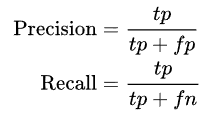

In [14]:
data2= open('wiki.test.txt',encoding='utf-8').read()

In [97]:
resultTest= re.findall(r"(\w+)\t(\w+).* (\w+) such as (\w+)",data2, re.MULTILINE) #(\w+)\t(\w+).*such (\w+) as (?:(\w+)|(.*),)+
resultTest2= re.findall(r"(\w+)\t(\w+).* (\w+) or other (\w+)",data2, re.MULTILINE)

In [98]:
print(resultTest)

[('fda', 'agency', 'agencies', 'the'), ('fda', 'agency', 'Agencies', 'the'), ('nrc', 'agency', 'agencies', 'the'), ('brussels', 'airport', 'companies', 'Ryanair'), ('hangzhou', 'airport', 'away', 'Yiwu'), ('heathrow', 'airport', 'destinations', 'Heathrow'), ('jeddah', 'airport', 'cities', 'Galkacyo'), ('newark', 'airport', 'airports', 'Philadelphia'), ('seattle', 'airport', 'hubs', 'Anchorage'), ('subang', 'airport', 'expressways', 'Elite'), ('nato', 'alignment', 'countries', 'Austria'), ('benadryl', 'antihistamine', 'Antihistamine', 'Diphenhydramine'), ('benadryl', 'antihistamine', 'antihistamine', 'Benadryl'), ('palestinian', 'arab', 'subjects', 'the'), ('saudi', 'arab', 'states', 'the'), ('matisse', 'artist', 'painters', 'Cézanne'), ('photographer', 'artist', 'artists', 'British'), ('cartel', 'association', 'companies', 'Rough'), ('shepard', 'astronaut', 'individuals', 'Everett'), ('bard', 'author', 'authors', 'Julia'), ('collins', 'author', 'authors', 'Jackie'), ('lyricist', 'autho

In [108]:
# test 1
TP=0
FP=0
FN=0
for element in resultTest:
  if element[1] == element[2].lower() and element[0] == element[3].lower():
    TP+=1
  elif element[1] != element[2].lower() and element[0] == element[3].lower():
    FP+=1
  elif element[0] == element[3].lower():
    FN+=1



In [110]:
print('precision of "(\w+) such as (\w+)"  :', TP/(TP+FP),'Recall :', TP/(TP+FN))

precision of "(\w+) such as (\w+)"  : 0.2978723404255319 Recall : 1.0


In [99]:
print(resultTest2)

[('leg', 'body', 'leg', 'body'), ('pond', 'body', 'pond', 'body'), ('earth', 'celestial', 'body', 'point'), ('planet', 'celestial', 'planet', 'celestial'), ('window', 'construction', 'construction', 'offshore'), ('bottle', 'container', 'bottle', 'container'), ('canoe', 'craft', 'paddles', 'projects'), ('embezzlement', 'crime', 'embezzlement', 'crime'), ('chlorine', 'element', 'chlorine', 'chemical'), ('dysprosium', 'element', 'holmium', 'rare'), ('version', 'explanation', 'theologians', 'people'), ('pyrex', 'glass', 'Pyrex', 'types'), ('bitterness', 'hatred', 'men', 'women'), ('disease', 'health', 'disease', 'health'), ('idol', 'image', 'image', 'material'), ('acetone', 'ketone', 'peroxide', 'oxidizers'), ('law', 'legal', 'Understanding', 'legal'), ('information', 'message', 'campaign', 'social'), ('sam', 'missile', 'aircraft', 'missiles'), ('card', 'paper', 'paper', 'traditional'), ('synagogue', 'place', 'synagogue', 'place'), ('bishop', 'priest', 'bishop', 'priest'), ('bishop', 'prie

In [126]:
# test 2
TP=0
FP=0
FN=0
for element in resultTest2:
  if element[0] == element[2] and element[1] == element[3]:
    TP+=1
  elif element[0] != element[2] and element[1] == element[3]:
    FP+=1
  elif element[0] == element[3]:
    FN+=1


In [127]:
print(len(resultTest2), TP, FP, FN)

45 11 4 0


In [128]:
print('precision of "(\w+) or other (\w+)" :', TP/(TP+FP),'Recall :', TP/(TP+FN))

precision of "(\w+) or other (\w+)" : 0.7333333333333333 Recall : 1.0


***Develop regular expressions to extract some other lexico-semantic relationship besides hypernym/hyponym
pairs. For example, you could try to extract meronyms or troponyms.***

***(6 points) Implement an extension.***


In [172]:
extend= re.findall(r"(\w+) is made of (\w+)",data2, re.MULTILINE) 
extend2= re.findall(r"(\w+) part of the (\w+)",data2, re.MULTILINE) 

In [173]:
print(extend)

[('bridge', 'pre'), ('wood', '48'), ('Pyrex', 'Corning'), ('glassware', 'borosilicate'), ('Kitchen', 'tempered'), ('It', 'silicon'), ('mention', 'Lew'), ('use', 'this')]


In [174]:
print(extend2)

[('as', 'Korean'), ('autonomous', 'East'), ('is', 'California'), ('Though', 'FBI'), ('southeastern', 'state'), ('southern', 'city'), ('As', 'planning'), ('been', 'leadership'), ('western', 'Dili'), ('as', 'airport'), ('is', 'Lufthansa'), ('as', '66th'), ('is', 'CTA'), ('as', '10'), ('as', 'challenge'), ('As', 'latter'), ('early', '20th'), ('then', 'USSR'), ('is', 'Federal'), ('up', 'Cornubian'), ('up', 'Cornubian'), ('both', 'Chiloé'), ('became', 'editorial'), ('integral', 'femur'), ('top', 'femur'), ('proximal', 'bone'), ('also', 'Creswell'), ('annexed', 'Bronx'), ('southwestern', 'borough'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('became', 'County'), ('became', 'Metropolitan'), ('big', 'Assyrians'), ('significant', 'City'), ('

***(4 points) Describe your approach and results.***

 The apporach used was to try and use phrases that might capture meronyms and holonyms. I did happen to capture "Ultraviolet part of the light" and " glassware is made of borosilicate" which reflects part/whole, whole/part relationship.